<a href="https://colab.research.google.com/github/angelocodes/MachineLearning/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

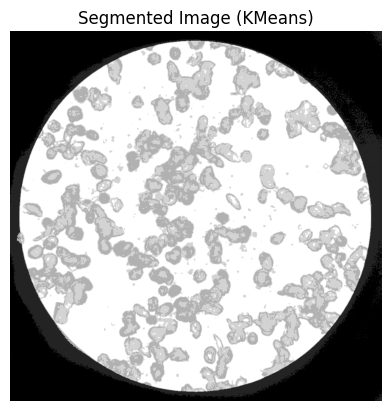

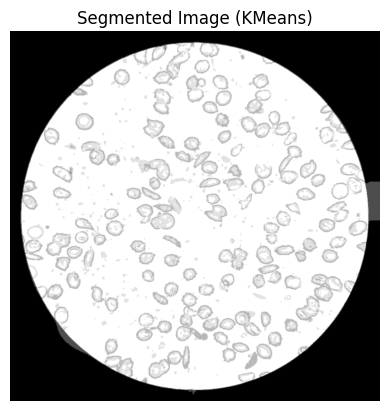

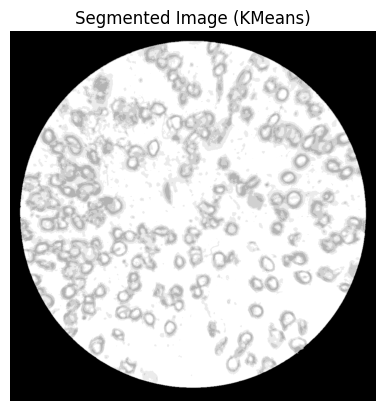

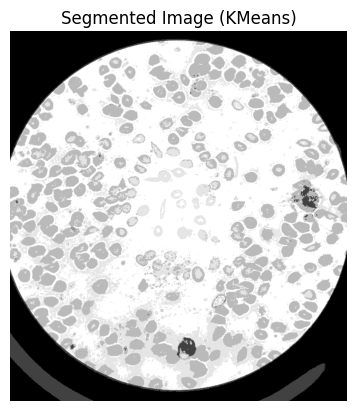

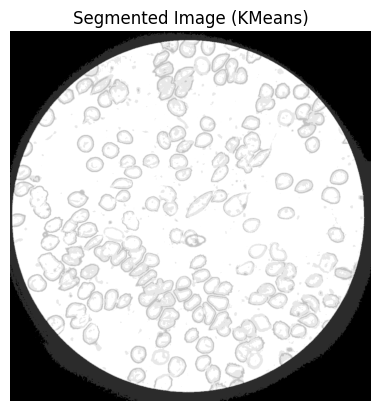

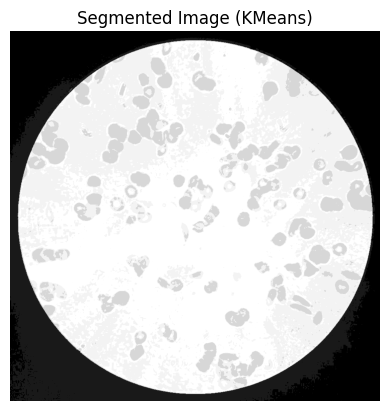

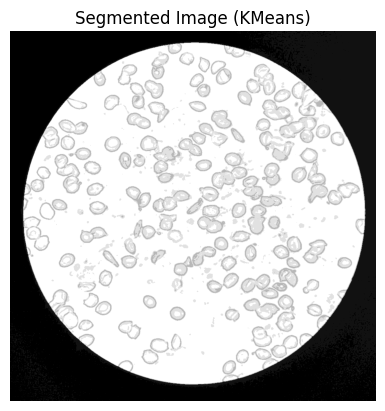

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


KeyboardInterrupt: 

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Path to the folder containing images
folder_path = "/content/Unlabelled"

# Function to perform image segmentation using KMeans
def segment_image(image_path, k=5):
    # Load image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize the pixel values to a range of 0 to 1
    gray_image = gray_image / 255.0

    # Reshape the image to a 2D array of pixels
    pixels = gray_image.reshape(-1, 1)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(pixels)

    # Replace pixel values with their cluster centroids
    segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(gray_image.shape)

    return segmented_img



# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
        # Full path to the image file
        image_path = os.path.join(folder_path, filename)

        # Perform segmentation on the image
        segmented_image = segment_image(image_path)

        # Display or save the segmented image as needed
        plt.imshow(segmented_image, cmap='gray')
        plt.title("Segmented Image (KMeans)")
        plt.axis('off')
        plt.show()


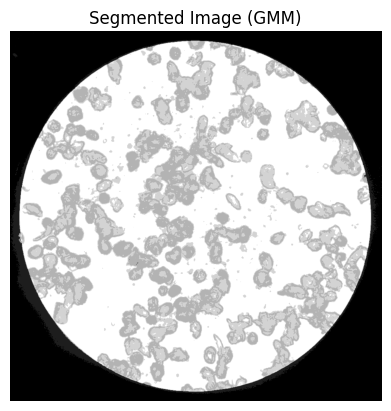

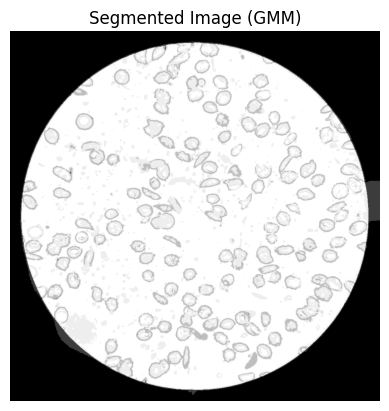

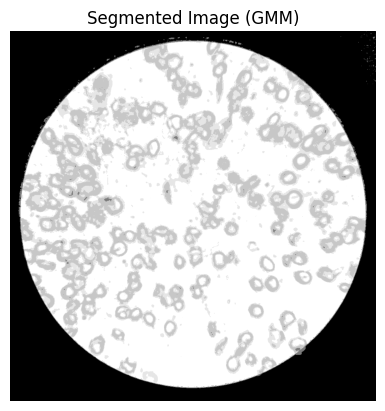

KeyboardInterrupt: 

In [5]:

from sklearn.mixture import GaussianMixture

# Function to perform image segmentation using Gaussian Mixture Model
def segment_image_with_gmm(image_path, k=5):
    # Load image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize the pixel values to a range of 0 to 1
    gray_image = gray_image / 255.0

    # Reshape the image to a 2D array of pixels
    pixels = gray_image.reshape(-1, 1)

    # Perform Gaussian Mixture Model clustering
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(pixels)

    # Predict the most likely cluster for each pixel
    labels = gmm.predict(pixels)

    # Replace pixel values with the mean of the Gaussian component for each cluster
    segmented_img = gmm.means_[labels].reshape(gray_image.shape)

    return segmented_img

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
        # Full path to the image file
        image_path = os.path.join(folder_path, filename)

        # Perform segmentation using Gaussian Mixture Model on the image
        segmented_image = segment_image_with_gmm(image_path)

        # Display or save the segmented image as needed
        plt.imshow(segmented_image, cmap='gray')
        plt.title("Segmented Image (GMM)")
        plt.axis('off')
        plt.show()
